In [1]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
# import BatchNormalization
from keras.layers import BatchNormalization
from keras.layers import Dropout

2024-03-31 00:06:30.866105: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 00:06:31.351700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 00:06:31.351775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 00:06:31.436913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 00:06:31.569367: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 00:06:31.576081: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load data
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)
data = data.astype({'x1': 'float', 'x2': 'float', 'x3': 'float', 'y1': 'category', 'y2': 'float'})


In [4]:
# split
X = data[['x1', 'x2', 'x3']].values
Y_class = data['y1'].values
Y_reg = data['y2'].values
# print one line of data
i= 180
print(X[i], Y_class[i], Y_reg[i])

[-0.0700291  -0.1018302   0.01919956] 2 5.05797


In [5]:
# onehot encode the class labels
encoder = OneHotEncoder(sparse_output=False)
Y_class = encoder.fit_transform(Y_class.reshape(-1, 1))
# Y_class = Y_class.toarray()


In [6]:
print(Y_class[180])
print(Y_class[280])
print(Y_class[0])
print(Y_class[1])

[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
X_train, X_test, Y_class_train, Y_class_test, Y_reg_train, Y_reg_test = train_test_split(X, Y_class, Y_reg, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, Y_class_train.shape, Y_class_test.shape, Y_reg_train.shape, Y_reg_test.shape)

(448, 3) (112, 3) (448, 8) (112, 8) (448,) (112,)


In [8]:
from nn_trainer import trainer_model

In [9]:
# nn model
# def create_model(input_dim, output_dim):
#     initializer = keras.initializers.he_normal(seed=42)
#     return trainer_model(
#         layers=[
#             Input(shape=(input_dim,)),
#         ]
#     )


In [9]:
input_layer = Input(shape=(3,))  

hidden_layer_1 = Dense(1024, activation='relu')(input_layer)
hidden_layer_1 = Dropout(0.3)(hidden_layer_1)
hidden_layer_2 = Dense(512, activation='relu')(hidden_layer_1)
hidden_layer_2 = BatchNormalization()(hidden_layer_2)
hidden_layer_3 = Dense(2048, activation='elu')(hidden_layer_2)
hidden_layer_3 = Dropout(0.3)(hidden_layer_3)


class_output = Dense(8, activation='softmax', name='class_output')(hidden_layer_3)  
reg_output = Dense(1, name='reg_output')(hidden_layer_3)  


model = Model(inputs=input_layer, outputs=[class_output, reg_output])

# add regularization to the model


2024-03-31 00:09:01.806724: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 00:09:01.812359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 00:09:02.141204: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required l

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss={'class_output': 'categorical_crossentropy', 'reg_output': 'mean_squared_error'},
              metrics={'class_output': 'accuracy', 'reg_output': 'mean_squared_error'})


In [11]:
history = model.fit(X_train, [Y_class_train, Y_reg_train],
                    validation_split=0.3,
                    epochs=100,
                    batch_size=32,
                    verbose=2)

Epoch 1/100
10/10 - 3s - loss: 22.0035 - class_output_loss: 2.0586 - reg_output_loss: 19.9450 - class_output_accuracy: 0.1374 - reg_output_mean_squared_error: 19.9450 - val_loss: 26.2267 - val_class_output_loss: 2.0687 - val_reg_output_loss: 24.1581 - val_class_output_accuracy: 0.2000 - val_reg_output_mean_squared_error: 24.1581 - 3s/epoch - 269ms/step
Epoch 2/100
10/10 - 0s - loss: 13.2246 - class_output_loss: 1.8851 - reg_output_loss: 11.3395 - class_output_accuracy: 0.2684 - reg_output_mean_squared_error: 11.3395 - val_loss: 22.0675 - val_class_output_loss: 2.0550 - val_reg_output_loss: 20.0125 - val_class_output_accuracy: 0.2593 - val_reg_output_mean_squared_error: 20.0125 - 155ms/epoch - 16ms/step
Epoch 3/100
10/10 - 0s - loss: 6.9954 - class_output_loss: 1.8370 - reg_output_loss: 5.1584 - class_output_accuracy: 0.2971 - reg_output_mean_squared_error: 5.1584 - val_loss: 19.8127 - val_class_output_loss: 2.0376 - val_reg_output_loss: 17.7751 - val_class_output_accuracy: 0.2593 - val

In [12]:
model.evaluate(X_test, [Y_class_test, Y_reg_test])

4/4 [==============================] - 0s 3ms/step - loss: 2.8211 - class_output_loss: 1.2753 - reg_output_loss: 1.5459 - class_output_accuracy: 0.4464 - reg_output_mean_squared_error: 1.5459


[2.8211307525634766,
 1.2752711772918701,
 1.545859694480896,
 0.4464285671710968,
 1.545859694480896]

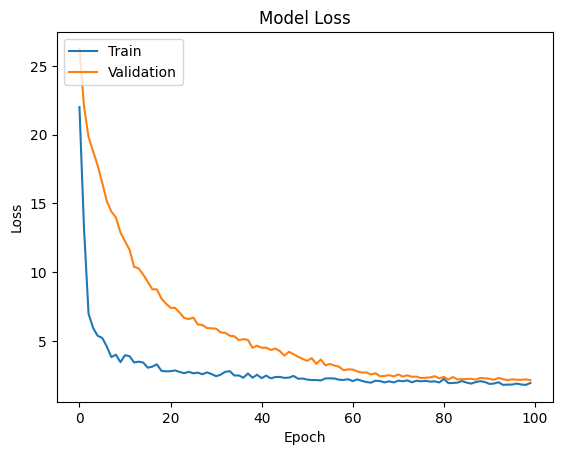

In [13]:
#  draw the landscape of the loss function
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

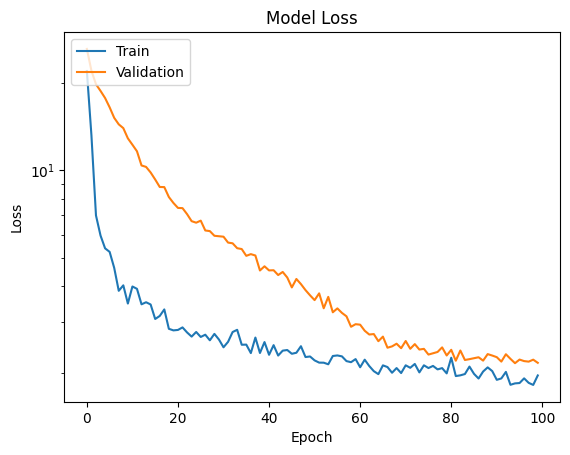

In [14]:
# beautify the plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.yscale('log')
plt.show()


In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense (Dense)       │ (None, 1024)      │   4,096 │ input_layer[0][0]    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │       0 │ dense[0][0]          │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │ 524,800 │ dropout[0][0]        │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalization │ (None, 512)       │   2,048 │ dense_1[0][0]        │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_2 (Dense)     │ (None, 286)       │ 146,718 │ batch_normalization… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_1 (Dropout) │ (None, 286)       │       0 │ dense_2[0][0]        │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ class_output        │ (None, 8)         │   2,296 │ dropout_1[0][0]      │
│ (Dense)             │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ reg_output (Dense)  │ (None, 1)         │     287 │ dropout_1[0][0]      │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 2,038,689 (7.78 MB)

 Trainable params: 679,221 (2.59 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 1,358,444 (5.18 MB)

In [15]:
# pridection
i= 0
print(X[i], Y_class[i], Y_reg[i])


[ 0.00902681 -0.04783698 -0.01826162] [1. 0. 0. 0. 0. 0. 0. 0.] 1.0


In [16]:

x_new = X[1]

x_new = x_new.reshape(1, -1)

x_new

array([[ 0.02150743,  0.00640325, -0.04351044]])

In [17]:
y_class_p, y_reg_p = model.predict(x_new)

print(y_class_p[0])
print(y_reg_p[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0.10316101 0.05606828 0.02612244 0.13573425 0.03552317 0.21072368
 0.08906259 0.34360453]
[4.129134]


<!-- z -->